In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import vartools as vt

## get_data

In [2]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"

data = vt.get_data(stocks, start_date, end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


## var_stocks

In [3]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"

data = vt.get_data(stocks, start_date, end_date)
n_stocks =[2193, 1211, 3221, 761, 1231]
conf = 95
long = True

var_df = vt.var_stocks(data, n_stocks, conf, long, stocks)
var_df

[*********************100%***********************]  5 of 5 completed


,Métrica,Porcentaje,cash
0,VaR,0.029022,32862.330777
1,cVaR,0.046523,52679.294625


## var_forex

In [4]:
currencies = ['CHFMXN=X', 'MXN=X']
start_date = "2020-01-01"
end_date = "2024-12-02"

data = vt.get_data(currencies, start_date, end_date)
positions = [7100000, 5300000] # How much you have in each currency. Must match the order in currencies.
conf = 99 # Nivel de confianza
long = True

var_forex_df = vt.var_forex(data, positions, conf, long, currencies)
var_forex_df

[*********************100%***********************]  2 of 2 completed


,Métrica,Porcentual,Cash
0,VaR,0.018482,5.041648e+06
1,cVaR,0.023751,6.478979e+06


## rebalance_stocks

In [5]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"

data = vt.get_data(stocks, start_date, end_date)

rt = data.pct_change().dropna()
stock_value = n_stocks * data.iloc[-1]
portfolio_value = stock_value.sum()
w_original = stock_value / portfolio_value
w_opt = [0.33, 0.15, 0.06, 0.46, 0.00]

rebalance_df = vt.rebalance_stocks(w_original, w_opt, data, stocks, portfolio_value)
rebalance_df

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,TSLA,AMD,LMT,JPM
Original Weights,0.247901,0.131740,0.184246,0.301323,0.134791
Target Weights,0.330000,0.150000,0.060000,0.460000,0.000000
Shares (Buy/Sell),726.275424,167.855128,-2172.073744,400.743951,-1231.000000


## var_weights

In [6]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"

data = vt.get_data(stocks, start_date, end_date)

weights = [0.2457, 0.1301, 0.1820, 0.3064, 0.1358]
conf = 95
var_pct = vt.var_weights(data, weights, conf)
var_pct

[*********************100%***********************]  5 of 5 completed


0.0288495255228367

## cvar_weights

In [7]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"

data = vt.get_data(stocks, start_date, end_date)

weights = [0.2457, 0.1301, 0.1820, 0.3064, 0.1358]
conf = 95
cvar_pct = vt.cvar_weights(data, weights, conf)
cvar_pct

[*********************100%***********************]  5 of 5 completed


0.04634394806997194

## cvar_contributions

In [8]:
# bonds, commodities, equities and real estate
stocks = ['VBTLX', 'GSG', 'VTI', 'VNQ']
start_date = '2019-01-01'
end_date = '2024-01-01'

data = vt.get_data(stocks, start_date, end_date)
returns = data.pct_change().dropna()
alpha = 95

mcc_weights = vt.OptimizePortfolioWeights(returns, 0.05).opt_mcc(alpha)

cvar_contributions = vt.cvar_contributions(mcc_weights, returns, alpha)
cvar_contributions

[*********************100%***********************]  4 of 4 completed


[0.002948258227682024,
 0.002964287600480629,
 0.002740912279669177,
 0.0029629411072298107]

## call_delta and put_delta

In [9]:
S_call = 20.3
K_call = 20.43
r_call = 0.0425
sigma_call = 0.102
T_call = 1/12

S_put = 20.3
K_put = 20.2
r_put = 0.0425
sigma_put = 0.156
T_put = 1/12

delta_call = vt.BlackScholes().call_delta(S_call, K_call, r_call, sigma_call, T_call)
delta_put = vt.BlackScholes().put_delta(S_put, K_put, r_put, sigma_put, T_put)

delta_call, delta_put

(0.46740603432697553, 0.4165136615097752)

In [10]:
# Write in order S, K, r, sigma, T

call = [20.3, 20.43, 0.0425, 0.102, 1/12]
put = [20.3, 20.2, 0.0425, 0.156, 1/12]

delta_call = vt.BlackScholes().call_delta(*call)
delta_put = vt.BlackScholes().put_delta(*put)

delta_call, delta_put

(0.46740603432697553, 0.4165136615097752)

## delta_hedge

In [11]:
# Write in order S, K, r, sigma, T, N (money invested in each option)

info_call = [[20.3, 20.43, 0.0425, 0.102, 1/12, 23],
            [20.3, 20.52, 0.0425, 0.111, 1/12, 25],
            [20.3, 20.43, 0.0421, 0.297, 6/12, 17],
            [20.3, 20.52, 0.0421, 0.289, 6/12, 32]]

info_put = [[20.3, 20.2, 0.0425, 0.156, 1/12, 12],
            [20.3, 20, 0.0425, 0.153, 1/12, 16],
            [20.3, 20.2, 0.0421, 0.348, 6/12, 11],
            [20.3, 20, 0.0421, 0.378, 6/12, 17]]

# If N is in millions of dollar, then
hedge = vt.BlackScholes().delta_hedge(info_call, info_put)
print(f'Buy {hedge} millions of dollars of the underlying asset')

Buy 27.301081694288555 millions of dollars of the underlying asset


## OptimizePortfolioWeights

In [12]:
stocks=['WMT','AAPL','GOOGL','PG','XOM','KO','CMG','F']
start_date='2020-01-01'
end_date='2024-11-24'

data = vt.get_data(stocks, start_date, end_date)
returns = data.pct_change().dropna()
rf = 0.04413

opt_sharpe_weights = vt.OptimizePortfolioWeights(returns, rf).opt_max_sharpe()
opt_sharpe_weights

[*********************100%***********************]  8 of 8 completed


array([4.21613305e-01, 1.58041342e-01, 0.00000000e+00, 1.00868539e-17,
       1.41568379e-01, 0.00000000e+00, 2.78776975e-01, 1.76630276e-17])

In [13]:
tickers = ['NVDA','AMZN','AVGO','PG','V','RL','GLD']

benchmark = 'SPY'
start_date = '2025-01-01'
end_date = '2025-12-31'

price = vt.get_data(tickers, start_date, end_date)
benchmark_data = vt.get_data([benchmark], start_date, end_date)

rt_benchmark = benchmark_data.pct_change().dropna()
rt = price.pct_change().dropna()

min_semivar_weights = vt.OptimizePortfolioWeights(rt, 0.0).opt_min_semivar(rt_benchmark)
min_semivar_weights

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed


array([3.49324450e-04, 2.84217307e-01, 0.00000000e+00, 1.56649186e-01,
       3.03961493e-01, 1.43148568e-18, 2.54822690e-01])

## plot_weights

[*********************100%***********************]  8 of 8 completed


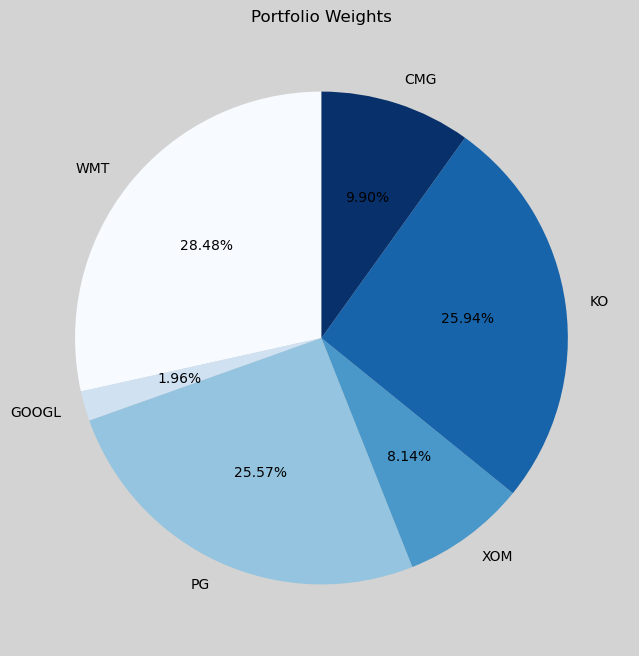

In [14]:
stocks=['WMT','AAPL','GOOGL','PG','XOM','KO','CMG','F']
start_date='2020-01-01'
end_date='2024-11-24'

data = vt.get_data(stocks, start_date, end_date)
returns = data.pct_change().dropna()
rf = 0.04413

min_var = vt.OptimizePortfolioWeights(returns, rf).opt_min_var()

vt.plot_weights(stocks, min_var)

## DynamicBacktesting

In [15]:
stocks=['WMT','AAPL','GOOGL','PG','XOM','KO','CMG','F']
start_date='2020-01-01'
end_date='2024-11-24'

data = vt.get_data(stocks, start_date, end_date)
returns = data.pct_change().dropna()
rf = 0.0035
pv = 1_000_000.0
months = 2

history = vt.DynamicBacktesting(price, benchmark_data, capital=1_000_000, rf=rf, months=months, alpha=0.95).simulation()
history

[*********************100%***********************]  8 of 8 completed


,Min Variance,Sharpe,Semivariance,Omega,Min CVaR,MCC
Date,,,,,,
2025-03-06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
2025-03-07,1.000488e+06,1.000942e+06,9.990817e+05,9.760426e+05,1.003371e+06,1.003492e+06
2025-03-10,9.891510e+05,9.892641e+05,9.829353e+05,9.163380e+05,9.922131e+05,9.786534e+05
2025-03-11,9.877453e+05,9.838176e+05,9.749140e+05,9.364773e+05,9.650744e+05,9.814677e+05
2025-03-12,9.884510e+05,9.872713e+05,9.783738e+05,9.451203e+05,9.671083e+05,9.869970e+05
...,...,...,...,...,...,...
2025-12-23,1.222391e+06,1.332535e+06,1.217508e+06,1.242143e+06,9.993031e+05,1.171339e+06
2025-12-24,1.227117e+06,1.329896e+06,1.221051e+06,1.245343e+06,9.961342e+05,1.171387e+06
2025-12-26,1.231842e+06,1.340914e+06,1.226306e+06,1.252135e+06,1.006275e+06,1.175338e+06


## simulate_portfolio

[*********************100%***********************]  5 of 5 completed


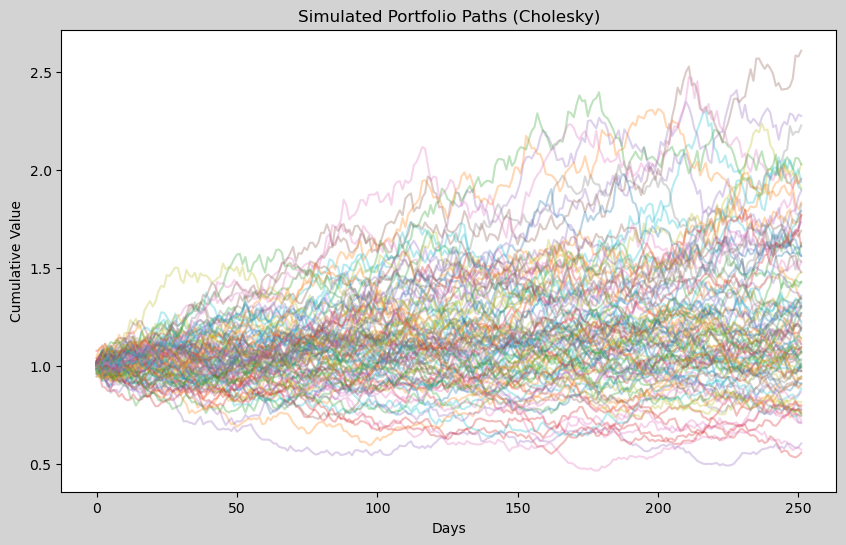

In [16]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"

data = vt.get_data(stocks, start_date, end_date)
weights = [0.2, 0.2, 0.2, 0.2, 0.2]
days = 252
N = 10000

simulations = vt.simulate_portfolio(data, weights, days, N)

plt.figure(figsize=(10, 6))
plt.plot(simulations[:, :100], alpha=0.3)
plt.title("Simulated Portfolio Paths (Cholesky)")
plt.xlabel("Days")
plt.ylabel("Cumulative Value")
plt.show()

## Bond

In [17]:
# Create a 5-year bond with 6% annual coupon, priced at 8% yield
bond = vt.Bond(
    face_value=1000,
    coupon_rate=0.06,
    years_to_maturity=5,
    yield_to_maturity=0.08,
    payments_per_year=1
)

# Get bond price
price = bond.price()
print(f"Bond Price: ${price:.2f}")

# Get risk metrics
mac_dur = bond.macaulay_duration()
mod_dur = bond.modified_duration()
conv = bond.convexity()

print(f"Macaulay Duration: {mac_dur:.4f} years")
print(f"Modified Duration: {mod_dur:.4f}")
print(f"Convexity: {conv:.4f}")

# Estimate price change for +100bp yield increase
total_chg, dur_eff, conv_eff = bond.price_change_estimate(0.01)
print(f"\nPrice change for +100bp: {total_chg*100:.2f}%")
print(f"Duration effect: {dur_eff*100:.2f}%")
print(f"Convexity effect: {conv_eff*100:.2f}%")

Bond Price: $920.15
Macaulay Duration: 4.4393 years
Modified Duration: 4.1105
Convexity: 21.9108

Price change for +100bp: -4.00%
Duration effect: -4.11%
Convexity effect: 0.11%


In [18]:
# Print full summary
print(bond.summary())


BOND SUMMARY

TERMS:
  Face Value:           $1,000.00
  Coupon Rate:          6.000%
  Years to Maturity:    5
  Payments per Year:    1

VALUATION:
  Yield to Maturity:    8.000%
  Price:                $920.1458
  Price (per 100):      92.0146

RISK METRICS:
  Macaulay Duration:    4.4393 years
  Modified Duration:    4.1105
  Convexity:            21.9108

SENSITIVITY (for +100bp yield change):
  Duration Effect:      -4.1105%
  Convexity Effect:     +0.1096%
  Total Price Change:   -4.0009%




In [19]:
# Semi-annual coupon bond example
bond_semi = vt.Bond(
    face_value=1000,
    coupon_rate=0.05,
    years_to_maturity=10,
    yield_to_maturity=0.045,
    payments_per_year=2
)

print(f"Semi-annual bond price: ${bond_semi.price():.2f}")
print(f"Macaulay Duration: {bond_semi.macaulay_duration():.4f} years")
print(f"Modified Duration: {bond_semi.modified_duration():.4f}")
print(f"Convexity: {bond_semi.convexity():.4f}")

Semi-annual bond price: $1039.91
Macaulay Duration: 8.0356 years
Modified Duration: 7.8587
Convexity: 74.5506
